#VGG16

In [1]:
# Setting seeds to try and ensure we have the same results - this is not guaranteed across PyTorch releases.
import torch
torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [2]:
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [4]:
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
    ])

trainset = datasets.CIFAR10(root='~/.pytorch/CIFAR10',train=True, download=True,transform=transform)
testset = datasets.CIFAR10(root='~/.pytorch/CIFAR10',train=False, transform=transform)

trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

100%|██████████| 170498071/170498071 [00:03<00:00, 47366486.56it/s]


Extracting /root/.pytorch/CIFAR10/cifar-10-python.tar.gz to /root/.pytorch/CIFAR10


In [5]:
for images, labels in trainloader:
  print(images.size(), labels.size())
  break

torch.Size([64, 3, 224, 224]) torch.Size([64])


In [6]:
model = models.vgg16(pretrained=True)
model

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:06<00:00, 86.8MB/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [7]:
# For Checking Feature Section
model.features

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_si

In [8]:
model.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)

In [9]:
for param in model.parameters():
    param.requires_grad = False

In [10]:
model.classifier[-1] = nn.Sequential(
              nn.Linear(in_features=4096, out_features=10),
              nn.LogSoftmax(dim=1)
              )

In [11]:
# For Checking the modified Classifier
model.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Sequential(
    (0): Linear(in_features=4096, out_features=10, bias=True)
    (1): LogSoftmax(dim=1)
  )
)

In [12]:
criterion = nn.NLLLoss()

In [13]:
w = torch.randn(4,3,requires_grad=True)
w

tensor([[ 0.2912,  1.6909, -1.1488],
        [-1.3980, -0.4260, -0.1896],
        [-1.3463,  1.0735, -0.0482],
        [ 1.6063,  0.7751, -0.5726]], requires_grad=True)

In [14]:
w.requires_grad_(False)

tensor([[ 0.2912,  1.6909, -1.1488],
        [-1.3980, -0.4260, -0.1896],
        [-1.3463,  1.0735, -0.0482],
        [ 1.6063,  0.7751, -0.5726]])

In [15]:
w.requires_grad_(True)

tensor([[ 0.2912,  1.6909, -1.1488],
        [-1.3980, -0.4260, -0.1896],
        [-1.3463,  1.0735, -0.0482],
        [ 1.6063,  0.7751, -0.5726]], requires_grad=True)

In [16]:
y = torch.exp(w)
print(y)

tensor([[1.3381, 5.4243, 0.3170],
        [0.2471, 0.6531, 0.8273],
        [0.2602, 2.9257, 0.9529],
        [4.9841, 2.1707, 0.5641]], grad_fn=<ExpBackward0>)


In [17]:
print(y.grad_fn) # Auto Calculation of gradient by Autograd

In [18]:
output = y.mean()
print(output)

tensor(1.7221, grad_fn=<MeanBackward0>)


In [19]:
# The Grad is None Because Backward Function on output function
print(w.grad)

None


In [20]:
output.backward()
print(w.grad)

tensor([[0.1115, 0.4520, 0.0264],
        [0.0206, 0.0544, 0.0689],
        [0.0217, 0.2438, 0.0794],
        [0.4153, 0.1809, 0.0470]])


In [21]:
print(output.requires_grad)

True


In [22]:
with torch.no_grad():
  output = (w+y).mean()
  print(output.requires_grad)

False


**You Can Ignore All the Above as it is a part of custom back prop algo**

In [2]:
pip install tensorflow 

  Using cached tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata (3.5 kB)
  Using cached tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata (5.0 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.5.4-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached h5py-3.11.0-cp311-cp311-win_amd64.whl.metadata (2.5 kB)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached ml_dtypes-0.3.2-cp311-cp311-win_amd64.whl.metadata (20 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached grpcio-1.62.2-cp311-cp311-win_amd64.whl.metadata (4.2 kB)
  Using cached tensorboard-2.16.2-py3-none-any.whl.metadata (1.6 kB)

In [1]:
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout
from keras.models import Model
import tensorflow as tf

In [2]:
base_model = VGG16(weights='imagenet',include_top=False,input_shape=(224,224,3))

In [3]:
base_model = tf.keras.applications.VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [4]:
for layer in base_model.layers:
  layer.trainable=False

In [5]:
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8,activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ ?                      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,024,384 (76.39 MB)

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [56]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=20,      # Rotate the image by up to 20 degrees
    width_shift_range=0.1,  # Shift the image horizontally by up to 10%
    height_shift_range=0.1, # Shift the image vertically by up to 10%
    shear_range=0.1,        # Shear the image by up to 10%
    zoom_range=0.1,         # Zoom in/out on the image by up to 10%
    horizontal_flip=True,   # Flip the image horizontally
    vertical_flip=True,     # Flip the image vertically
    fill_mode='nearest' )
test_datagen = ImageDataGenerator(rescale=1./255,rotation_range=20,      # Rotate the image by up to 20 degrees
    width_shift_range=0.1,  # Shift the image horizontally by up to 10%
    height_shift_range=0.1, # Shift the image vertically by up to 10%
    shear_range=0.1,        # Shear the image by up to 10%
    zoom_range=0.1,         # Zoom in/out on the image by up to 10%
    horizontal_flip=True,   # Flip the image horizontally
    vertical_flip=True,     # Flip the image vertically
    fill_mode='nearest' )
valid_datagen = ImageDataGenerator(rescale=1./255,rotation_range=20,      # Rotate the image by up to 20 degrees
    width_shift_range=0.1,  # Shift the image horizontally by up to 10%
    height_shift_range=0.1, # Shift the image vertically by up to 10%
    shear_range=0.1,        # Shear the image by up to 10%
    zoom_range=0.1,         # Zoom in/out on the image by up to 10%
    horizontal_flip=True,   # Flip the image horizontally
    vertical_flip=True,     # Flip the image vertically
    fill_mode='nearest' )

In [15]:
train_dir = "D:/tea/train"
test_dir = "D:/tea/test"
val_dir = "D:/tea/val"

In [16]:
import os

# List all files and directories in the current directory
files_and_directories = os.listdir(train_dir)
print(files_and_directories)
print("\n")
files_and_directories = os.listdir(test_dir)
print(files_and_directories)
print("\n")
files_and_directories = os.listdir(val_dir)
print(files_and_directories)

['algal leaf', 'Anthracnose', 'bird eye spot', 'brown blight', 'gray light', 'healthy', 'red leaf spot', 'white spot']


['algal leaf', 'Anthracnose', 'bird eye spot', 'brown blight', 'gray light', 'healthy', 'red leaf spot', 'white spot']


['algal leaf', 'Anthracnose', 'bird eye spot', 'brown blight', 'gray light', 'healthy', 'red leaf spot', 'white spot']


In [17]:
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="categorical",
                                               seed=42)
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="categorical",
                                               seed=42)
val_data = valid_datagen.flow_from_directory(directory=val_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="categorical",
                                               seed=42)

Found 734 images belonging to 8 classes.
Found 80 images belonging to 8 classes.
Found 80 images belonging to 8 classes.


In [57]:
# Fit the model
model.fit(train_data,epochs=10,validation_data=val_data)            

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 337s 12s/step - accuracy: 0.1823 - loss: 8.6003 - val_accuracy: 0.5500 - val_loss: 1.2620
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 284s 11s/step - accuracy: 0.5938 - loss: 1.1541 - val_accuracy: 0.6125 - val_loss: 1.0464
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 281s 11s/step - accuracy: 0.7874 - loss: 0.6361 - val_accuracy: 0.7000 - val_loss: 0.8849
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 283s 11s/step - accuracy: 0.8708 - loss: 0.4110 - val_accuracy: 0.7250 - val_loss: 0.7487
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 284s 11s/step - accuracy: 0.9093 - loss: 0.3060 - val_accuracy: 0.7000 - val_loss: 0.7507
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 280s 11s/step - accuracy: 0.9185 - loss: 0.2580 - val_accuracy: 0.7375 - val_loss: 0.7154
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 285s 11s/step - accuracy: 0.9680 - loss: 0.1851 - val_accuracy: 0.7250 - val_loss: 0.6855
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 284s 11s/step - accuracy: 0.9689 - loss: 0.1605 - val_accuracy: 0.

In [30]:
model.evaluate(test_data) #vgg16 model evaluation

3/3 ━━━━━━━━━━━━━━━━━━━━ 25s 6s/step - accuracy: 0.6547 - loss: 1.3441


[1.3656833171844482, 0.637499988079071]

In [75]:
model.evaluate(test_data) #vgg19 model evaluation

3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 6s/step - accuracy: 0.6445 - loss: 1.1060


[1.181729793548584, 0.625]

In [78]:
model.evaluate(test_data) #vgg19 model evaluation

3/3 ━━━━━━━━━━━━━━━━━━━━ 25s 8s/step - accuracy: 0.6852 - loss: 1.2844


[1.3055274486541748, 0.675000011920929]

In [58]:
import pandas as pd
import matplotlib.pyplot as plt 

history = pd.DataFrame(model.history.history)

<Axes: >

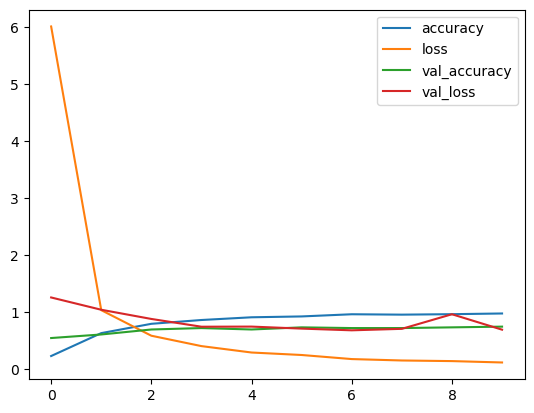

In [59]:
history.plot()

In [7]:
from tensorflow.keras.models import load_model

In [51]:
model.save('tea.h5')

In [60]:
model.save('teavgg19_1.h5')

In [61]:
new = load_model('teavgg19_1.h5')

In [75]:
new.evaluate(test_data) #vgg19 model evaluation

3/3 ━━━━━━━━━━━━━━━━━━━━ 30s 7s/step - accuracy: 0.6445 - loss: 1.0424


[1.116626262664795, 0.625]

In [69]:
from tensorflow.keras.preprocessing import image

# Load and preprocess the image
img_path = 'D:/img.jpg'
img = image.load_img(img_path, target_size=(224, 224))


In [70]:
x = image.img_to_array(img)
## Scaling
x=x/255
x = np.expand_dims(x, axis=0)

In [71]:
def normalize_image(img):
    # Convert image to float32
    img = image.astype(np.float32)
    # Normalize image by dividing each pixel value by the maximum pixel value (255)
    normalized_image = img / 255.0
    return normalized_image

In [72]:
predictions = new.predict(x)
predicted_class_index = np.argmax(predictions[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


In [73]:
files_and_directories[predicted_class_index]

'healthy'

In [74]:
import numpy as np
preds = new.predict(test_data)
preds=np.argmax(preds, axis=1)

2/3 ━━━━━━━━━━━━━━━━━━━━ 8s 9s/step  WARNING:tensorflow:5 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001C0349A7740> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


3/3 ━━━━━━━━━━━━━━━━━━━━ 29s 7s/step


In [19]:
preds

array([3, 4, 2, 3, 1, 2, 4, 7, 4, 7, 4, 7, 6, 3, 6, 4, 7, 6, 5, 4, 4, 6,
       4, 4, 3, 6, 4, 5, 7, 3, 5, 7, 6, 5, 5, 7, 6, 4, 4, 7, 7, 4, 1, 3,
       0, 5, 0, 3, 7, 5, 4, 1, 7, 2, 2, 2, 4, 2, 4, 3, 7, 1, 3, 7, 1, 6,
       6, 3, 4, 0, 6, 2, 2, 0, 7, 0, 6, 7, 1, 6], dtype=int64)

In [20]:
class_labels = ['algal leaf', 'Anthracnose', 'bird eye spot', 'brown blight', 'gray light', 'healthy', 'red leaf spot', 'white spot']
predicted_labels = [class_labels[i] for i in preds]
print('Predicted labels:', predicted_labels)

Predicted labels: ['brown blight', 'gray light', 'bird eye spot', 'brown blight', 'Anthracnose', 'bird eye spot', 'gray light', 'white spot', 'gray light', 'white spot', 'gray light', 'white spot', 'red leaf spot', 'brown blight', 'red leaf spot', 'gray light', 'white spot', 'red leaf spot', 'healthy', 'gray light', 'gray light', 'red leaf spot', 'gray light', 'gray light', 'brown blight', 'red leaf spot', 'gray light', 'healthy', 'white spot', 'brown blight', 'healthy', 'white spot', 'red leaf spot', 'healthy', 'healthy', 'white spot', 'red leaf spot', 'gray light', 'gray light', 'white spot', 'white spot', 'gray light', 'Anthracnose', 'brown blight', 'algal leaf', 'healthy', 'algal leaf', 'brown blight', 'white spot', 'healthy', 'gray light', 'Anthracnose', 'white spot', 'bird eye spot', 'bird eye spot', 'bird eye spot', 'gray light', 'bird eye spot', 'gray light', 'brown blight', 'white spot', 'Anthracnose', 'brown blight', 'white spot', 'Anthracnose', 'red leaf spot', 'red leaf spo